In [215]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import itertools
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [216]:
# true values
_a = 0.5
_b = 0.3

In [217]:
# samples
points = np.array([[x, _a * x + _b + .1 * np.random.randn() + (np.random.randint(100) == 0) * np.random.rand() * 10] for x in np.arange(0, 10, 0.01)])

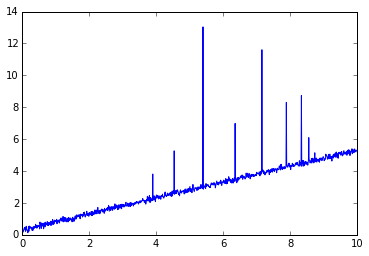

In [218]:
plt.plot(points[:, 0], points[:, 1])

In [213]:
data = points



In [236]:
def getParamWithSamples(samples):
    p0 = samples[0]
    p1 = samples[1]
    dp = p1 - p0
    a = dp[1] / dp[0]
    b = p0[1] - a * p0[0]
    return a, b
    

def getError(model, p):
    a = model[0]
    b = model[1]
    x = p[0]
    y = p[1]
    return np.abs(a * x + b - y)

def ransac(data,
        # parameters for RANSAC
        n = 2, # required sample num to decide parameter
        k = 1000, # max loop num
        t = 2.0, # threshold error val for inlier
        d = 800 # requrired inlier sample num to be correnct model
    ):

    bestfit = None
    besterr = float('inf')
    iterations = 0
    while iterations < k:
        maybeinliers = data[np.random.choice(len(data), 2, False)]
        maybemodel = getParamWithSamples(maybeinliers)

        alsoinliers = []
        for p in data:
            if (p == maybeinliers).any(): continue
            if getError(maybemodel, p) > t: continue

            alsoinliers.append(p)


        if len(alsoinliers) > d:
            bettermodel = maybemodel
            thiserror = np.array([getError(maybemodel, p) for p in data]).mean()
            if thiserror < besterr:
                bestfit = bettermodel
                besterr = thiserror


        iterations += 1

    return bestfit

def leastSquare(data):
    bestfit = None
    besterr = float('inf')
    for a in np.arange(0, 1, 0.01):
        print a
        for b in np.arange(0, 1, 0.01):
            sumerr = 0
            for p in data:
                error = getError((a, b), p) ** 2
                sumerr += error
            if sumerr < besterr:
                besterr = sumerr
                bestfit = (a, b)
    return bestfit
                
            
    

In [237]:
leastSquare(data)

0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.21
0.22
0.23
0.24
0.25
0.26
0.27
0.28
0.29
0.3
0.31
0.32
0.33
0.34
0.35
0.36
0.37
0.38
0.39
0.4
0.41
0.42
0.43
0.44
0.45
0.46
0.47
0.48
0.49
0.5
0.51
0.52
0.53
0.54
0.55
0.56
0.57
0.58
0.59
0.6
0.61
0.62
0.63
0.64
0.65
0.66
0.67
0.68
0.69
0.7
0.71
0.72
0.73
0.74
0.75
0.76
0.77
0.78
0.79
0.8
0.81
0.82
0.83
0.84
0.85
0.86
0.87
0.88
0.89
0.9
0.91
0.92
0.93
0.94
0.95
0.96
0.97
0.98
0.99


(0.5, 0.35000000000000003)